<a href="https://colab.research.google.com/github/Mutasar/sewa-sepeda/blob/main/Mutasar_bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mutasar]
- **Email:** [mutasarstmik@gmail.com]
- **ID Dicoding:** [l319ywd083]

## Menentukan Pertanyaan Bisnis



```
# Ini diformat sebagai kode
```
- Pertanyaan 1 : Apa tren penggunaan sepeda berdasarkan waktu?
Menganalisis penggunaan sepeda per hari, minggu, atau bulan untuk mengidentifikasi pola musiman.
- Pertanyaan 2 : Apa perbedaan antara pengguna terdaftar dan pengguna sementara?
Menganalisis perilaku pengguna berdasarkan kategori dapat membantu dalam strategi pemasaran.

## Import Semua Packages/Library yang Digunakan

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/ariniamsr/bike-sharing/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Pengujian data tabel day:**

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

tidak ada data missing value baik didata day maupun di hour

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


tidak ada data duplikasi, baik didata day maupun di hour

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


memerikas parameter statistik dari kolom numerik yang terdapat didalam day

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


parameter statistik dari kolom numerik yang terdapat didalam data hour

**Insight:**
- xxx
- xxx

### Cleaning Data

**Membersihkan data:**


untuk menganalisa Perbedaan antara Pengguna Terdaftar dan Pengguna Sementara, kolom-kolom yang dapat dihapus adalah:

instant: Tidak diperlukan untuk analisis perbandingan.
dteday: Dapat diubah tetapi tidak diperlukan dalam bentuk mentah.
season: Mungkin tidak relevan jika tidak menganalisis berdasarkan musim.
yr: Tidak perlu jika hanya membandingkan dua kategori pengguna.
holiday: Tidak relevan untuk analisis perbandingan.
weekday: Jika tidak penting untuk analisis perilaku pengguna.
workingday: Tidak relevan untuk perbandingan pengguna.
weathersit: Tidak diperlukan untuk analisis perilaku pengguna.

mebersihkan data yang tidak digunakan:

tabel day

In [ ]:
day_df = pd.read_csv('https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv')


print("Kolom sebelum penghapusan:")
print(day_df.columns)

# Menghapus kolom yang tidak diperlukan
columns_to_drop = [
    'instant',
    'dteday',
    'season',
    'yr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit'
]

day_df.drop(columns=columns_to_drop, inplace=True)


print("\nKolom setelah penghapusan:")
print(day_df.columns)

day_df.to_csv('data_cleaned.csv', index=False)


Kolom sebelum penghapusan:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Kolom setelah penghapusan:
Index(['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')


Tabel Hour

In [ ]:
hour_df= pd.read_csv('https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/hour.csv')


print("Kolom sebelum penghapusan:")
print(hour_df.columns)

# Menghapus kolom yang tidak diperlukan
columns_to_drop = [
    'instant',
    'dteday',
    'season',
    'yr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit'
]

hour_df.drop(columns=columns_to_drop, inplace=True)


print("\nKolom setelah penghapusan:")
print(hour_df.columns)
hour_df.to_csv('data_cleaned.csv', index=False)


Kolom sebelum penghapusan:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Kolom setelah penghapusan:
Index(['mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mnth        731 non-null    int64  
 1   temp        731 non-null    float64
 2   atemp       731 non-null    float64
 3   hum         731 non-null    float64
 4   windspeed   731 non-null    float64
 5   casual      731 non-null    int64  
 6   registered  731 non-null    int64  
 7   cnt         731 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 45.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mnth        17379 non-null  int64  
 1   hr          17379 non-null  int64  
 2   temp        17379 non-null  float64
 3   atemp       17379 non-null  float64
 4   hum         17379 non-null  float64
 5   windspeed   17379 non-null  float64

Mengubah tipe data :

memeriksa kolom

In [ ]:
print(day_df.columns)
print(hour_df.columns)

Index(['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')
Index(['mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


int to category

In [ ]:
columns = ['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

object to datetime

In [ ]:
print("Kolom yang ada:")
print(day_df.columns)

# Menghapus spasi dari nama kolom
day_df.columns = day_df.columns.str.strip()
hour_df.columns = hour_df.columns.str.strip()
# Memeriksa keberadaan kolom 'dteday'
if 'dteday' in day_df.columns:
    # Mengubah tipe data kolom 'dteday' menjadi datetime
    data['dteday'] = pd.to_datetime(data['dteday'])
    print("\nTipe data setelah pengubahan:")
    print(day_df.dtypes)
    print(hour_df.dtypes)
else:
    print("Kolom 'dteday' tidak ditemukan dalam DataFrame.")


Kolom yang ada:
Index(['dteday', 'cnt'], dtype='object')

Tipe data setelah pengubahan:
dteday    datetime64[ns]
cnt                int64
dtype: object
mnth          category
hr               int64
temp          category
atemp         category
hum           category
windspeed     category
casual        category
registered    category
cnt           category
dtype: object


pada data diatas menampilkan category

In [ ]:
data.columns = data.columns.str.strip()

# Memastikan kolom 'registered' dan 'casual' ada
if 'registered' in data.columns and 'casual' in data.columns:
    # Membuat kolom baru 'category' berdasarkan nilai 'registered' dan 'casual'
    data['category'] = data.apply(lambda row: 'registered' if row['registered'] > 0 else 'casual', axis=1)

    # Menampilkan beberapa baris untuk memeriksa kolom baru
    print(data[['registered', 'casual', 'category']].head())
else:
    print("Kolom 'registered' atau 'casual' tidak ditemukan dalam DataFrame.")

   registered  casual    category
0         654     331  registered
1         670     131  registered
2        1229     120  registered
3        1454     108  registered
4        1518      82  registered


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

Explore Data day dan hour :

In [ ]:
day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:

day_df = pd.read_csv('https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv')



day_df.columns = day_df.columns.str.strip()


if 'registered' in day_df.columns and 'cnt' in day_df.columns:

    # Menghitung total penyewaan berdasarkan status pengguna
    rental_summary = day_df.groupby('registered')['cnt'].sum().reset_index()

    # Mengganti nilai 0 dan 1 dengan 'casual' dan 'registered'
    rental_summary['registered'] = rental_summary['registered'].map({0: 'casual', 1: 'registered'})

    # Menampilkan hasil ringkasan penyewaan
    print(rental_summary)

else:
    print("Kolom 'registered' atau 'cnt' tidak ditemukan dalam DataFrame.")

    registered   cnt
0          NaN    22
1          NaN   431
2          NaN   441
3          NaN   754
4          NaN   506
..         ...   ...
674        NaN  7572
675        NaN  7693
676        NaN  7691
677        NaN  8167
678        NaN  7733

[679 rows x 2 columns]


In [ ]:
day_df.groupby(by="holiday").agg({
    "registered": ["sum"]
})


,registered
,sum
holiday,
0,2616586
1,56076


### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [67]:
all_df.sample(5)

,instant_x,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
355,355,2011-12-21,1,0,12,0,3,1,2,0.428333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,564,2012-07-17,3,1,7,0,2,1,1,0.818333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,329,2011-11-25,4,0,11,0,5,1,1,0.375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,558,2012-07-11,3,1,7,0,3,1,1,0.716667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,485,2012-04-29,2,1,4,0,0,0,1,0.458333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


perbedaan antara pengguna terdaftar dan pengguna sementara

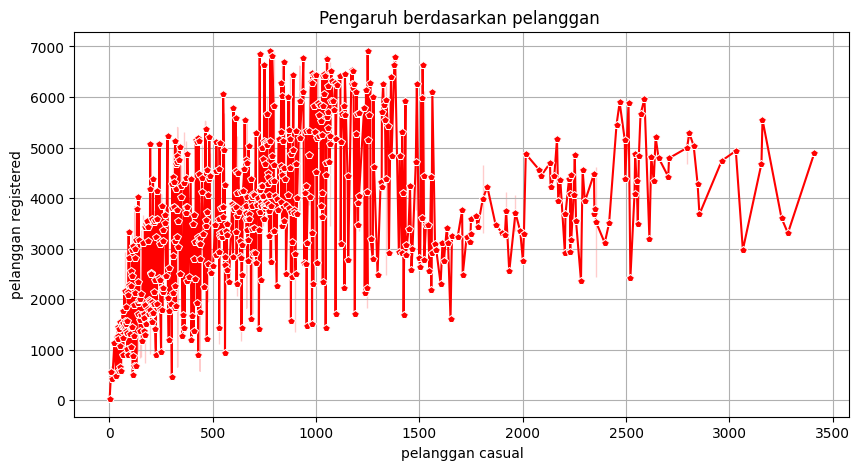

In [111]:
plt.figure(figsize=(10, 5))
# Membuat grafik garis
sns.lineplot(data = all_df, x='casual', y='registered', marker='p', color='r')
# Menambahkan judul dan label
plt.title('Pengaruh berdasarkan pelanggan ')
plt.xlabel('pelanggan casual')
plt.ylabel('pelanggan registered')
plt.grid()

# Menampilkan grafik
plt.show()

tren penggunaan sepeda berdasarkan waktu

<ipython-input-112-576c9ca3d06d>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_usage = data.resample('M', on='dteday').sum()


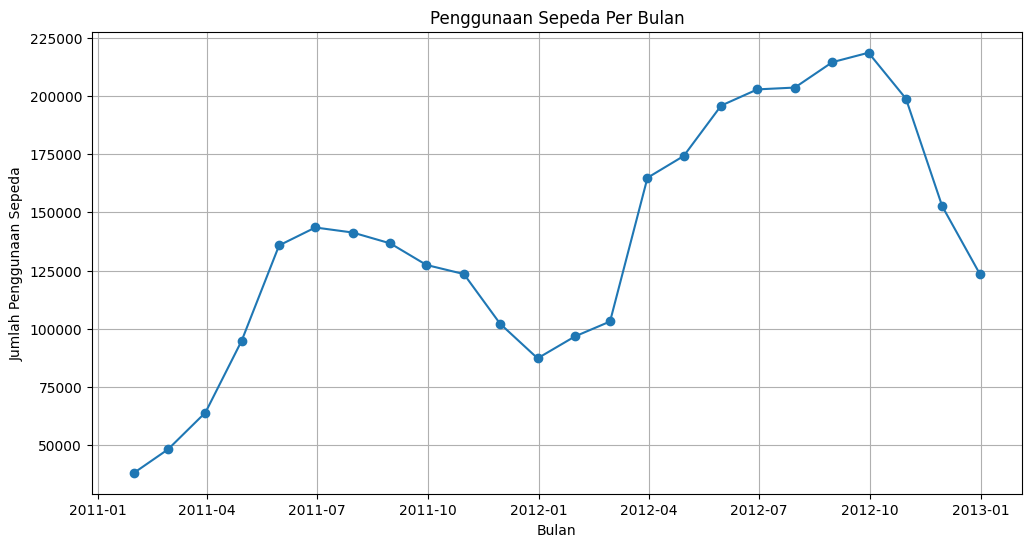

In [112]:
# Convert dteday to datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Agregasi data per bulan
monthly_usage = data.resample('M', on='dteday').sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_usage.index, monthly_usage['cnt'], marker='o')
plt.title('Penggunaan Sepeda Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid()
plt.show()

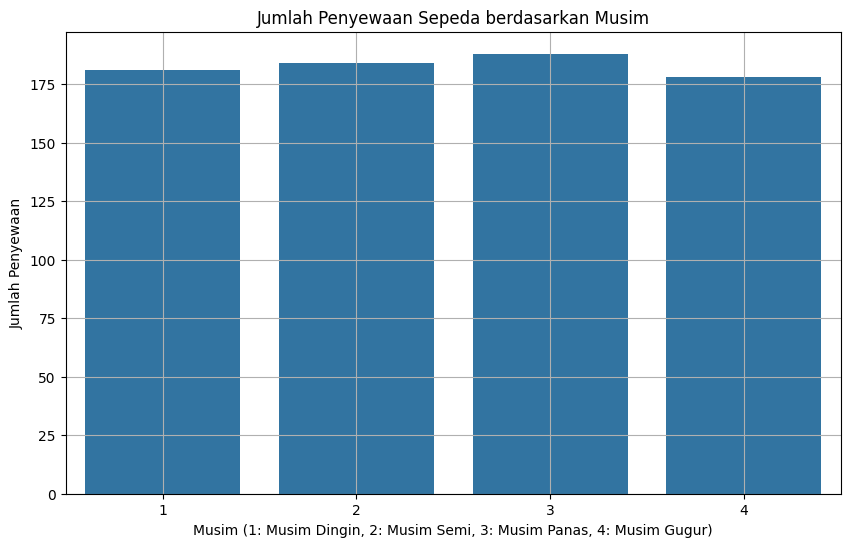

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(data=day_df, x='season', order=[1, 2, 3, 4])
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Musim (1: Musim Dingin, 2: Musim Semi, 3: Musim Panas, 4: Musim Gugur)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2